# HW2
This homework is about **Linear Regresion**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## mse_cost
This is mean squared error which is equal to: 
$$
   \frac{1}{2m} \sum_{i=1}^{m} (y_i - pred_i)^2
$$
I have used the vectorized version which is equal to:
$$
   \frac{1}{2m} sum( (y - pred)^2)
$$
y and pred are 1*m vectors.

In [2]:
def mse_cost(pred ,y):
    return np.sum(np.power(y - pred, 2))/(2*y.shape[0]) 

## Linear regression implementaion
I used the augmented version of Linear regression in which the bias is augmented in the weights.
1. init function initializes the weights of the model.
2. fit function uses the arguments and apply SGD on the dataset.
3. normal equation uses the direct method discussed in class to find the optimum weights.
4. optimize_w is a step of GD.
5. predict function uses the weights found by fit or normal_equation to predict for new data. 

In [3]:
class Linear_regression():
    
    def __init__(self):
        self.weight = np.array([])
        
    def predict(self,x_aug):
        return x_aug @ self.weight.T
    
    def optimize_w(self,y , x_aug , alpha,lamda):
        pred = self.predict(x_aug)
        number_of_examples = y.shape[0]
        new_w = self.weight - ((alpha/number_of_examples) * ((pred - y) @ x_aug)[0]) - (alpha*lamda/number_of_examples)*self.weight
        return new_w
    
    def fit(self,y, x_aug, alpha = 0.01 , batch_size = 50 , epochs = 1,weight = None,lamda=0,debug = False):
        costs = []
        if weight is None:
            self.weight = np.random.rand(x_aug.shape[1])
        else:
            self.weight = weight
        for j in range(epochs):
            iteration = math.ceil(y.shape[1]/batch_size)
            for i in range(iteration-1):
                self.weight = self.optimize_w(y[:,i*batch_size:(i+1)*batch_size] , x_aug[i*batch_size:(i+1)*batch_size,:],alpha,lamda)
                if i % 10 == 0 and debug:
                    costs.append(mse_cost(self.predict(x_aug), y))
            self.weight = self.optimize_w(y[:,(iteration-1)*batch_size:] , x_aug[(iteration-1)*batch_size:],alpha,lamda)
            if debug:
                costs.append(mse_cost(self.predict(x_aug), y))            
            print(f'epoch {j+1}...')
        return self.weight , costs
    
    def normal_equation(self,y , x_aug):
        self.weight = np.linalg.pinv(x_aug.T@x_aug)@x_aug.T@y
        return self.weight

### A simple test to see if LR is correctly implemented

epoch 1...
epoch 2...
epoch 3...
epoch 4...
epoch 5...
epoch 6...
epoch 7...
epoch 8...
epoch 9...
epoch 10...
epoch 11...
epoch 12...
epoch 13...
epoch 14...
epoch 15...
epoch 16...
epoch 17...
epoch 18...
epoch 19...
epoch 20...
epoch 21...
epoch 22...
epoch 23...
epoch 24...
epoch 25...
epoch 26...
epoch 27...
epoch 28...
epoch 29...
epoch 30...
epoch 31...
epoch 32...
epoch 33...
epoch 34...
epoch 35...
epoch 36...
epoch 37...
epoch 38...
epoch 39...
epoch 40...
epoch 41...
epoch 42...
epoch 43...
epoch 44...
epoch 45...
epoch 46...
epoch 47...
epoch 48...
epoch 49...
epoch 50...
epoch 51...
epoch 52...
epoch 53...
epoch 54...
epoch 55...
epoch 56...
epoch 57...
epoch 58...
epoch 59...
epoch 60...
epoch 61...
epoch 62...
epoch 63...
epoch 64...
epoch 65...
epoch 66...
epoch 67...
epoch 68...
epoch 69...
epoch 70...
epoch 71...
epoch 72...
epoch 73...
epoch 74...
epoch 75...
epoch 76...
epoch 77...
epoch 78...
epoch 79...
epoch 80...
epoch 81...
epoch 82...
epoch 83...
epoch 84...
e

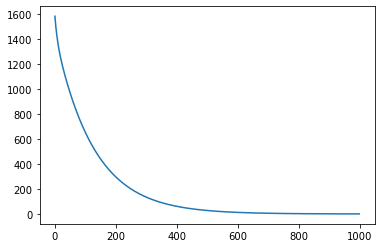

In [4]:
LR = Linear_regression()
x = np.array([[1,2.,2.],[1,-3.,-4.],[1,2.,2.],[1,-3.,-4.]])
y = np.array([30.,26.,30.,26.]).reshape(1,4)
w , costs = LR.fit(y,x,0.001,4,1000,None,debug=True)
plt.plot(costs)
plt.show()


In [5]:
y = np.array([30.,26.,30.,26.])
w = LR.normal_equation(y,x)
LR.predict([1,2,2])

29.999999999999993

## import data and visualization

In [6]:
train_data = pd.read_csv('dataset/data.csv')
train_data

,Price,Year,Mileage,City,State,Vin,Make,Model
0,40000,2017,2169,Murray,UT,3GCUKREC6HG127376,Chevrolet,Silverado
1,46991,2015,45079,Timonium,MD,1GC1KWEG9FF507573,Chevrolet,Silverado
2,38995,2017,10661,Oklahoma City,OK,3GCUKREC5HG354901,Chevrolet,Silverado
3,31860,2016,29058,Front Royal,VA,1GCVKREC3GZ189479,Chevrolet,Silverado
4,14700,2010,21824,Arlington,TX,1GCPCPEA6AZ241798,Chevrolet,Silverado
...,...,...,...,...,...,...,...,...
4294,20991,2013,66250,San Diego,CA,1GCRCSEAXDZ367632,Chevrolet,Silverado
4295,33997,2015,23000,Woods Cross,UT,3GCUKREC0FG214445,Chevrolet,Silverado
4296,29880,2014,86972,Omaha,NE,3GCUKSEC8EG291604,Chevrolet,Silverado
4297,35000,2011,141120,Cullman,AL,1GC4K1C88BF237452,Chevrolet,Silverado


## The rellation between price and manufacturing Year
The plot below shows that if a car is older it tends to be cheaper. 

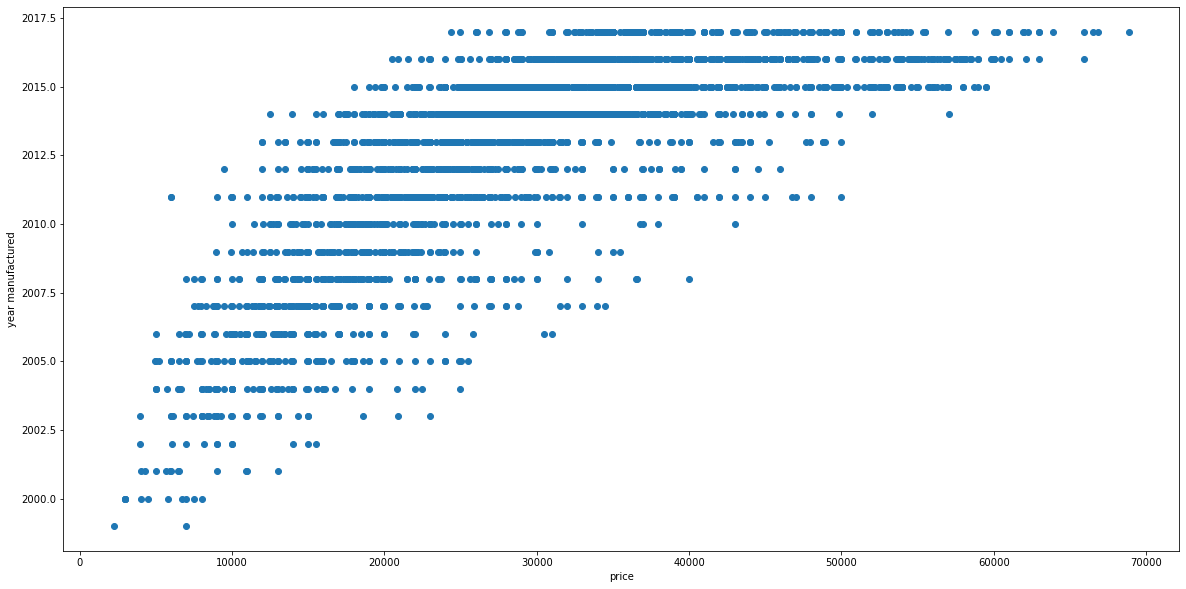

In [7]:
fig = plt.figure(figsize=(20,10))
plt.scatter(train_data['Price'],train_data['Year'])
plt.xlabel('price')
plt.ylabel('year manufactured')
plt.show()

## The rellation between price and  mileage
The plot below shows that if a car's mileage is higher it tends to be cheaper. 

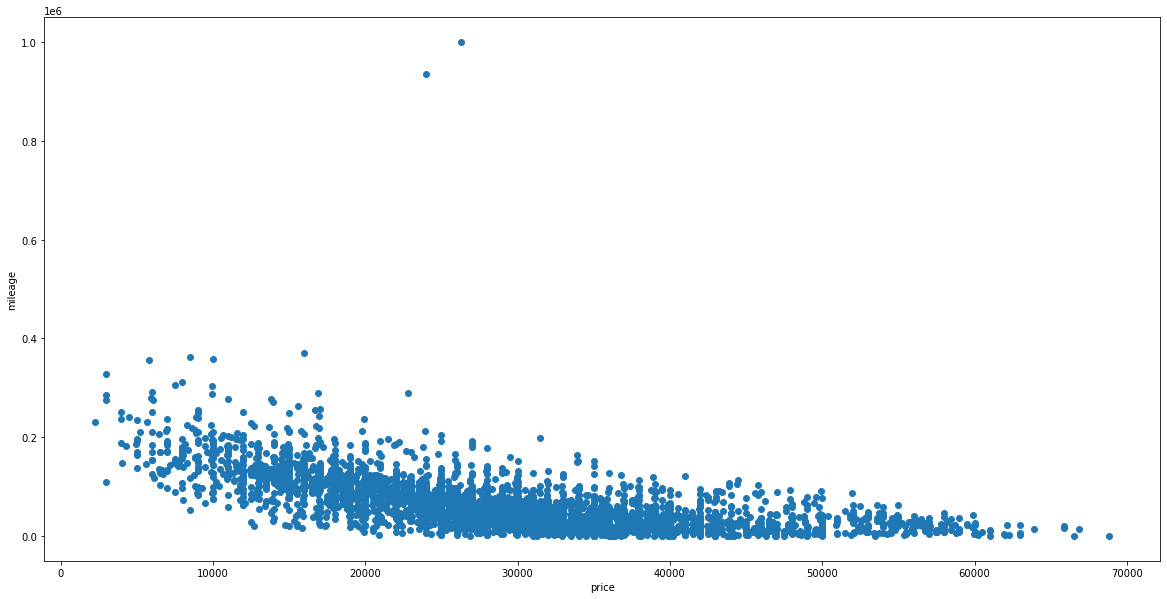

In [8]:
fig = plt.figure(figsize=(20,10))
plt.scatter(train_data['Price'],train_data['Mileage'])
plt.xlabel('price')
plt.ylabel('mileage')
plt.show()


## One hot encoding City and State columns

In [9]:
data = train_data
data = pd.get_dummies(data, columns = ['City','State'])
data

,Price,Year,Mileage,Vin,Make,Model,City_AURORA,City_Abbeville,City_Abilene,City_Acton,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY
0,40000,2017,2169,3GCUKREC6HG127376,Chevrolet,Silverado,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,46991,2015,45079,1GC1KWEG9FF507573,Chevrolet,Silverado,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38995,2017,10661,3GCUKREC5HG354901,Chevrolet,Silverado,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31860,2016,29058,1GCVKREC3GZ189479,Chevrolet,Silverado,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,14700,2010,21824,1GCPCPEA6AZ241798,Chevrolet,Silverado,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,20991,2013,66250,1GCRCSEAXDZ367632,Chevrolet,Silverado,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4295,33997,2015,23000,3GCUKREC0FG214445,Chevrolet,Silverado,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4296,29880,2014,86972,3GCUKSEC8EG291604,Chevrolet,Silverado,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4297,35000,2011,141120,1GC4K1C88BF237452,Chevrolet,Silverado,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Deleting the vin , Make , Model column

In [10]:
del data['Vin']
del data['Make']
del data['Model']

## impelemnting standardization

In [11]:
def standardize(x):
    return (x - np.mean(x))/np.var(x)

In [12]:
standardize(np.array([1,2,3]))

array([-1.5,  0. ,  1.5])

## impelemnting normalization

In [13]:
def normalize(x):
    return (x- np.min(x))/(np.max(x)- np.min(x))

In [14]:
normalize([2,4,6])

array([0. , 0.5, 1. ])

#### changing data types to float so that standardization and normalization does not cause data loss.

In [15]:
data['Price']=data['Price'].astype(float)
data['Year']=data['Year'].astype(float)
data['Mileage']=data['Mileage'].astype(float)

## standardization Or normalization
1. normalization is used on year column.
2. standardization is used on mileage column because it has anomaly.

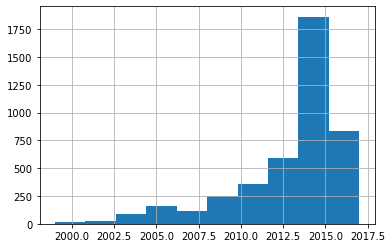

In [16]:
data['Year'].hist()
plt.show()

In [17]:
data['Year'] = normalize(data['Year'])

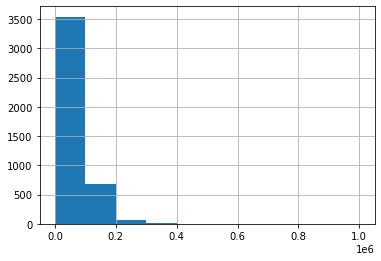

In [18]:
data['Mileage'].hist()
plt.show()

In [19]:
data['Mileage'] = standardize(data['Mileage'])
data

,Price,Year,Mileage,City_AURORA,City_Abbeville,City_Abilene,City_Acton,City_Acworth,City_Ada,City_Addison,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY
0,40000.0,1.000000,-0.000021,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,46991.0,0.888889,-0.000006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38995.0,1.000000,-0.000018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31860.0,0.944444,-0.000011,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,14700.0,0.611111,-0.000014,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,20991.0,0.777778,0.000002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4295,33997.0,0.888889,-0.000013,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4296,29880.0,0.833333,0.000010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4297,35000.0,0.666667,0.000029,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Adding bias to the data

In [20]:
data['bias'] = 1
data

,Price,Year,Mileage,City_AURORA,City_Abbeville,City_Abilene,City_Acton,City_Acworth,City_Ada,City_Addison,...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,bias
0,40000.0,1.000000,-0.000021,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,46991.0,0.888889,-0.000006,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38995.0,1.000000,-0.000018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31860.0,0.944444,-0.000011,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,14700.0,0.611111,-0.000014,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,20991.0,0.777778,0.000002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4295,33997.0,0.888889,-0.000013,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4296,29880.0,0.833333,0.000010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4297,35000.0,0.666667,0.000029,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
data['Year_2'] = np.power(data['Year'] ,2)
data['Mileage_2'] = np.power(data['Mileage'] ,2)
data['Year_3'] = np.power(data['Year'] ,3)
data['Mileage_3'] = np.power(data['Mileage'] ,3)
data['Mileage_Year'] = np.multiply(data['Mileage'],data['Year'])
data['Mileage_2_Year'] = np.multiply(data['Mileage_2'],data['Year'])
data['Mileage_Year_2'] = np.multiply(data['Mileage'],data['Year'])

    
data

,Price,Year,Mileage,City_AURORA,City_Abbeville,City_Abilene,City_Acton,City_Acworth,City_Ada,City_Addison,...,State_ WV,State_ WY,bias,Year_2,Mileage_2,Year_3,Mileage_3,Mileage_Year,Mileage_2_Year,Mileage_Year_2
0,40000.0,1.000000,-0.000021,0,0,0,0,0,0,0,...,0,0,1,1.000000,4.422743e-10,1.000000,-9.301171e-15,-0.000021,4.422743e-10,-0.000021
1,46991.0,0.888889,-0.000006,0,0,0,0,0,0,0,...,0,0,1,0.790123,3.040657e-11,0.702332,-1.676684e-16,-0.000005,2.702806e-11,-0.000005
2,38995.0,1.000000,-0.000018,0,0,0,0,0,0,0,...,0,0,1,1.000000,3.225488e-10,1.000000,-5.792860e-15,-0.000018,3.225488e-10,-0.000018
3,31860.0,0.944444,-0.000011,0,0,0,0,0,0,0,...,0,0,1,0.891975,1.278562e-10,0.842421,-1.445715e-15,-0.000011,1.207531e-10,-0.000011
4,14700.0,0.611111,-0.000014,0,0,0,0,0,0,0,...,0,0,1,0.373457,1.938539e-10,0.228224,-2.699055e-15,-0.000009,1.184662e-10,-0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,20991.0,0.777778,0.000002,0,0,0,0,0,0,0,...,0,0,1,0.604938,4.584495e-12,0.470508,9.816062e-18,0.000002,3.565719e-12,0.000002
4295,33997.0,0.888889,-0.000013,0,0,0,0,0,0,0,...,0,0,1,0.790123,1.821934e-10,0.702332,-2.459229e-15,-0.000012,1.619497e-10,-0.000012
4296,29880.0,0.833333,0.000010,0,0,0,0,0,0,0,...,0,0,1,0.694444,9.281676e-11,0.578704,8.942101e-16,0.000008,7.734730e-11,0.000008
4297,35000.0,0.666667,0.000029,0,0,0,0,0,0,0,...,0,0,1,0.444444,8.534502e-10,0.296296,2.493259e-14,0.000019,5.689668e-10,0.000019


## Implementing split data 
It gets a double between 0 and 1 and randomly split to train and cross validation data. 

In [22]:
def split_data(x,frac=0.9):
    train = x.sample(frac=frac)
    train_index = set(list(train.index))
    x_index = set(list(x.index))
    test_index = list(x_index.difference(train_index))
    test = x.loc[test_index]
    return train , test

In [23]:
train , test = split_data(data)

In [24]:
test

,Price,Year,Mileage,City_AURORA,City_Abbeville,City_Abilene,City_Acton,City_Acworth,City_Ada,City_Addison,...,State_ WV,State_ WY,bias,Year_2,Mileage_2,Year_3,Mileage_3,Mileage_Year,Mileage_2_Year,Mileage_Year_2
4099,17000.0,0.666667,-2.623882e-07,0,0,0,0,0,0,0,...,0,0,1,0.444444,6.884759e-14,0.296296,-1.806480e-20,-1.749255e-07,4.589839e-14,-1.749255e-07
4103,35591.0,0.944444,-1.594049e-05,0,0,0,0,0,0,0,...,0,0,1,0.891975,2.540992e-10,0.842421,-4.050464e-15,-1.505491e-05,2.399825e-10,-1.505491e-05
2057,12888.0,0.444444,4.389975e-05,0,0,0,0,0,0,0,...,0,0,1,0.197531,1.927188e-09,0.087791,8.460307e-14,1.951100e-05,8.565280e-10,1.951100e-05
14,36991.0,0.833333,-6.692297e-06,0,0,0,0,0,0,0,...,0,0,1,0.694444,4.478683e-11,0.578704,-2.997268e-16,-5.576914e-06,3.732236e-11,-5.576914e-06
2066,16988.0,0.777778,2.424517e-05,0,0,0,0,0,0,0,...,0,0,1,0.604938,5.878285e-10,0.470508,1.425200e-14,1.885736e-05,4.571999e-10,1.885736e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,12995.0,0.333333,2.392733e-05,0,0,0,0,0,0,0,...,0,0,1,0.111111,5.725171e-10,0.037037,1.369881e-14,7.975777e-06,1.908390e-10,7.975777e-06
4072,38495.0,0.888889,-1.548307e-05,0,0,0,0,0,0,0,...,0,0,1,0.790123,2.397254e-10,0.702332,-3.711685e-15,-1.376273e-05,2.130892e-10,-1.376273e-05
2025,26321.0,0.833333,7.066811e-06,0,0,0,0,0,0,0,...,0,0,1,0.694444,4.993981e-11,0.578704,3.529152e-16,5.889009e-06,4.161651e-11,5.889009e-06
2027,32491.0,0.888889,-1.088971e-05,0,0,0,0,0,0,0,...,0,0,1,0.790123,1.185857e-10,0.702332,-1.291364e-15,-9.679741e-06,1.054096e-10,-9.679741e-06


## train the model

In [25]:
x = np.array(train.loc[:,'Year':])
y = np.array(train['Price']).reshape(1,-1)


epoch 1...
epoch 2...
epoch 3...


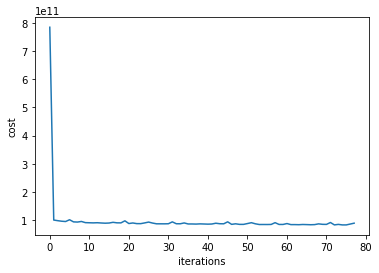

In [26]:
w , costs = LR.fit(y,x,0.01,16,3,debug = True)
plt.plot(costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [27]:
print(f'train_loss is:{mse_cost(LR.predict(train.iloc[:,1:]),train.iloc[:,0])}\ntest_loss is :{mse_cost(LR.predict(test.iloc[:,1:]),test.iloc[:,0])}')

train_loss is:22805512.67815387
test_loss is :25065850.117548123
